# MLP, GBR, LR on MCR & MT Data

10 - 04 - 2023 | Plot the compared models

In [29]:
#from google.colab import drive
#drive.mount('/content/drive')

In [30]:
#file = r'/content/drive/MyDrive/Colab/microservice-prediction/dataset.csv'

Data

In [31]:
import pandas as pd
import numpy as np

file = r'dataset-mcr-rt-180000.csv'
df = pd.read_csv(file)

# dataset
dataset = df.values
X = dataset[:, 6] # mt column
print(np.min(X)," ",np.max(X))
print(len(X))
Y = dataset[:, 5] # mcr column
print(np.min(Y)," ",np.max(Y))
print(len(Y))

0.01   5858.833333333333
179996
0.0253444780071999   4874.2
179996


Reshape + Split

In [32]:
X = X.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

print(len(X_train), len(Y_train))

134997 134997


Model Evaluation

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,100,100),
                   activation="relu",
                   solver="adam",
                   alpha=0.001,
                   learning_rate="adaptive",
                   learning_rate_init=0.00005,
                   max_iter=7000)
                   
pipe = make_pipeline(StandardScaler(), mlp)
pipe.fit(X_train, Y_train)
Y_predict_mlp = pipe.predict(X_test)

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(subsample=0.8,
                                learning_rate=0.02,
                                n_estimators=300,
                                max_depth=8,
                                min_samples_split=200, 
                                min_samples_leaf=40,
                                loss="absolute_error")
gbr.fit(X_train, Y_train)
Y_predict_gbr = gbr.predict(X_test)

from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train, Y_train)
Y_predict_lr = lr.predict(X_test)

Graph

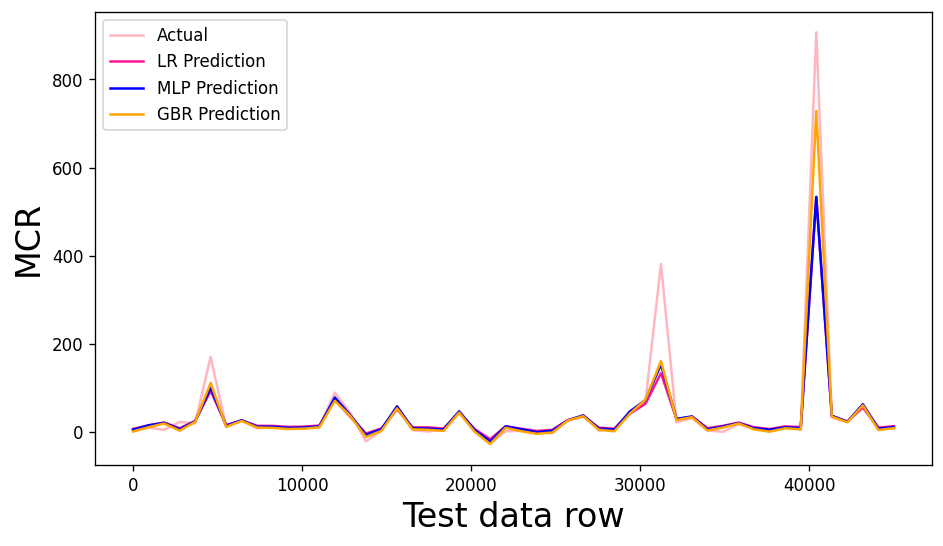

In [34]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

#print(np.shape(Y_predict_mlp), "  ", np.shape(Y_test))
plt.figure(figsize=(9, 5), dpi=120)
#https://www.geeksforgeeks.org/how-to-plot-a-smooth-curve-in-matplotlib/
X_Y_Spline = make_interp_spline(np.arange(44999), Y_test)
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(np.arange(44999).min(), np.arange(44999).max(), 50)
Y_ = X_Y_Spline(X_)
 
plt.plot(X_,Y_, label='Actual', color="lightpink")
X_Y_Spline = make_interp_spline(np.arange(44999), Y_predict_lr)
X_ = np.linspace(np.arange(44999).min(), np.arange(44999).max(), 50)
Y_ = X_Y_Spline(X_)

plt.plot(X_,Y_, label='LR Prediction', color="deeppink")
X_Y_Spline = make_interp_spline(np.arange(44999), Y_predict_mlp)
X_ = np.linspace(np.arange(44999).min(), np.arange(44999).max(), 50)
Y_ = X_Y_Spline(X_)

plt.plot(X_,Y_,  label='MLP Prediction', color="blue")
X_Y_Spline = make_interp_spline(np.arange(44999), Y_predict_gbr)
X_ = np.linspace(np.arange(44999).min(), np.arange(44999).max(), 50)
Y_ = X_Y_Spline(X_)
plt.plot(X_,Y_,  label='GBR Prediction', color="orange")
plt.ylabel('MCR', fontsize=20)
plt.xlabel('Test data row', fontsize=20)
plt.legend()
plt.show()